In [2]:
# Import libraries

import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import importlib
import meterUncertainty
import itertools
# importlib.reload(meterUncertainty)

In [3]:
# Import data, basic data cleanup

satelliteResults = pd.read_excel('/Users/evansherwin/PycharmProjects/SatelliteTesting/Data/AZ_Satellite_releases_v11.xls', sheet_name="Sheet1")
satelliteResults['Estimate (KGH) num'] = satelliteResults['Estimate (KGH)'].apply(pd.to_numeric, errors='coerce')
satelliteResults['Error num'] = satelliteResults['Error'].apply(pd.to_numeric, errors='coerce')*100
satelliteResults['Estimate in situ wind (KGH) num'] = satelliteResults['Estimate in situ wind (KGH)'].apply(pd.to_numeric, errors='coerce')
satelliteResults['Error in situ wind num'] = satelliteResults['Error in situ wind'].apply(pd.to_numeric, errors='coerce')*100
# satelliteResults.head()
satelliteResults

KeyError: 'Estimate (KGH)'

In [3]:
# Reorder satellite and team factor levels

satelliteNames = np.unique(satelliteResults['Satellite'])
numSatellites = satelliteNames.size
satelliteResults['SatelliteNum'] = pd.factorize(satelliteResults['Satellite'])[0] + 1
teamNames = np.unique(satelliteResults['Team'])
numTeams = teamNames.size
satelliteResults['teamNum'] = pd.factorize(satelliteResults['Team'])[0] + 1

In [25]:
# np.unique(satelliteResults['Satellite'])
satelliteResults['SatelliteNum']

0     1
1     2
2     2
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    4
12    4
13    4
14    2
15    2
16    3
17    3
18    3
19    3
20    5
21    5
22    1
23    3
24    3
25    3
26    3
27    1
28    2
29    2
30    3
31    3
32    3
33    3
34    4
35    4
36    4
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    1
46    2
47    2
48    1
49    3
50    3
51    3
52    3
Name: SatelliteNum, dtype: int64

In [11]:
# Generate meter errorbars (95% CI)
meterWithError = pd.DataFrame(columns=['Mean', 'P2.5', 'P97.5'], index=satelliteResults.index)
for jj in satelliteResults.index: # satelliteResults.index
    ObservationStats, ObservationStatsNormed, ObservationRealizationHolder = meterUncertainty.meterUncertainty(satelliteResults.loc[jj,'Logged SCFH'], satelliteResults.loc[jj, 'Meter'], satelliteResults.loc[jj, 'Pipe diameter'], 'AZ', 10000, hist=0, units='kgh')
    meterWithError.iloc[jj,:] =  ObservationStats
satelliteResults['Estimate (kgh) mean'] = meterWithError['Mean']
satelliteResults['Estimate (kgh) P2_5'] = meterWithError['P2.5']
satelliteResults['Estimate (kgh) P97_5'] = meterWithError['P97.5']
meterWithError
# satelliteResults[['Estimate (kgh) mean', 'Estimate (kgh) P2_5', 'Estimate (kgh) P97_5']]

,Mean,P2.5,P97.5
0,1679.04,1586.78,1771.09
1,2387.41,2249.33,2528.61
2,2387.65,2248.43,2528.07
3,4371.91,4132.98,4617.8
4,4374.82,4137.15,4615.96
5,4374.85,4135.74,4615.71
6,4376.3,4137.14,4616.53
7,7450.32,7043.62,7875.34
8,7456.32,7053.46,7872.75
9,7451.68,7042.69,7875.07


In [12]:
meteredErrorbars = abs(satelliteResults[['Estimate (kgh) P2_5', 'Estimate (kgh) P97_5']].sub(satelliteResults['Estimate (kgh) mean'], axis='index'))
# meteredErrorbarsFlat = np.concatenate(meteredErrorbars.values)
# meteredErrorbars.transpose()
# np.array(meteredErrorbars.transpose())
meteredErrorbarsFlat = np.concatenate(np.array(meteredErrorbars)).reshape(len(meteredErrorbars), 2).transpose()
meteredErrorbarsFlat

array([[92.2637054762979, 138.08574353815175, 139.21216219925918,
        238.92838343952735, 237.67032664151066, 239.10982040898125,
        239.16287620163166, 406.70104908999747, 402.86767615038116,
        408.9921830131261, 400.1965416538487, 233.28272306901408,
        233.6624086522038, 232.44069957826514, 251.67828631838438,
        249.71566975588848, 96.58207820449479, 94.37706349927953,
        95.04058726651942, 94.93309100808324, 218.17939255190367,
        225.2775420492526, 238.27420874544896, 231.56268624524364,
        232.41159341454295, 235.99836307721898, 228.4971492150048,
        11.438725246157844, 197.68642324208895, 196.84668715653834,
        203.96671403677146, 197.76666675616252, 202.48489583581386,
        201.72254865120203, 126.97498850380634, 126.56975160474894,
        125.99850921919415, 284.1984247535929, 278.3524562503062,
        286.5032191323917, 289.18437020267174, 0.0, 0.0, 0.0, 0.0, 0.0,
        61.01091797255572, 62.580295042839225, 10.5735011

In [88]:
# ObservationStats, ObservationStatsNormed, ObservationRealizationHolder = meterUncertainty.meterUncertainty(0, satelliteResults.loc[jj, 'Meter'], satelliteResults.loc[jj, 'Pipe diameter'], 'AZ', 10000, hist=0, units='scfh')
# ObservationStats
# satelliteResults['Logged SCFH'], \
# satelliteResults['Meter'], \
# satelliteResults['Pipe diameter']


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# Set color palette
# Red, orange, blue, gray, purple
colors = ['#C74632', '#D1660F', '#007C92', '#7F7776', '#734675']
colorsForErrorbars = ['#C74632', '#7F7776', '#D1660F', '#007C92', '#734675']
# Set your custom color palette
StanfordPalette = sns.set_palette(sns.color_palette(colors))
# StanfordPalette = sns.color_palette(colors)
StanfordPalette

<Figure size 432x288 with 0 Axes>

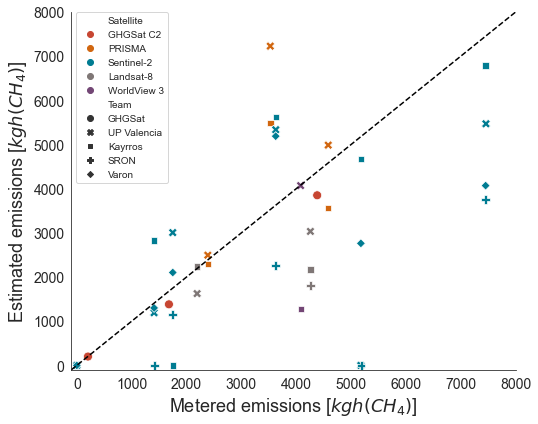

In [18]:
# ax = plt.gca()
fig = plt.gcf()
#fig.set_size_inches(100, 8)

mainScatterPlot = sns.relplot(data=satelliteResults, x='Estimate (kgh) mean', y='Estimate (KGH) num', style='Team', hue='Satellite', s=80, kind='scatter', height=6, aspect=1.05) #, legend=False) # 'logged KGH', palette='tab10'
# In situ wind
# mainScatterPlot = sns.relplot(data=satelliteResults, x='Estimate (kgh) mean', y='Estimate in situ wind (KGH) num', style='Team', hue='Satellite', s=80, kind='scatter', height=6, aspect=1.05) #, legend=False)
lims = [-100, 8000]
plt.plot(lims, lims, '--', color='black')
sns.move_legend(mainScatterPlot, 'upper left', bbox_to_anchor=(0.14, 0.99))
# plt.errorbar(x=satelliteResults['Estimate (kgh) mean'], y=satelliteResults['Estimate (KGH) num'], xerr=meteredErrorbarsFlat, yerr=satelliteResults['Estimate (KGH) num']*0.1, fmt='.')
# satelliteResults['Estimate (kgh) P97_5'] - satelliteResults['Estimate (kgh) mean']
# sns.set_style("white")
# plt.axhline(1000, ls='--', linewidth=3, color='red')
# plt.plot([0,0], [8000,8000])
# mainScatterPlot.ax_joint.plot([0,0], [8000,8000], '-', linewidth = 2)

plt.xlim(-100,8000) #10000
plt.ylim(-100,8000) #10000
# mainScatterPlot._legend.set_title("Satellite")
# mainScatterPlot._legend.set_title(None)
mainScatterPlot._legend.remove()
plt.legend(bbox_to_anchor=(0.01, 1), loc='upper left', borderaxespad=0)
           # ,label_order = sorted(ax._legend_data.keys(), key = int))#, title_fontsize= 'large')
# plt.legend(fontsize= 60)
# mainScatterPlot._legend.draw_frame(True)
mainScatterPlot._legend.set_frame_on(True)
plt.xlabel('Metered emissions [$kgh(CH_4)$]', fontsize=18)
plt.ylabel('Estimated emissions [$kgh(CH_4)$]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorsIter = itertools.cycle(colors).rotate(-1)
colorCounter = 0
# slctColor = colors[colorCounter]
# shapes = itertools.cycle(['o', 'x', 's', '+', 'd'])
for satellite in satelliteNames:
    selectedData = satelliteResults.loc[(satelliteResults['Satellite'] == satellite)]
    slctMeteredErrorbars = selectedData[['Estimate (kgh) P2_5', 'Estimate (kgh) P97_5']].sub(selectedData['Estimate (kgh) mean'], axis='index')
    slctMeteredErrorbarsFlat = np.concatenate(np.array(slctMeteredErrorbars)).reshape(len(slctMeteredErrorbars), 2).transpose()
    # selectedErrors = satelliteResults.loc[(satelliteResults['Satellite'] == satellite)]
    # plt.errorbar(selectedData['Estimate (kgh) mean'],
    #             selectedData['Estimate (KGH) num'], xerr=slctMeteredErrorbarsFlat, yerr=selectedData['Estimate (KGH) num']*0.1, fmt='.', color=slctColor)
    slctColor = colorsForErrorbars[colorCounter]
    # print(slctColor)
    # plt.errorbar(selectedData['Estimate (kgh) mean'], selectedData['Estimate (KGH) num'],
    # # plt.errorbar(selectedData['Estimate (kgh) mean'], selectedData['Estimate in situ wind (KGH) num'],
    #              xerr=np.array([np.abs(selectedData['Estimate (kgh) P2_5'] -
    #                                    selectedData['Estimate (kgh) mean']),
    #                             np.abs(selectedData['Estimate (kgh) P97_5'] -
    #                                    selectedData['Estimate (kgh) mean'])]),
    #             yerr=selectedData['Estimate (KGH) num']*0.1, fmt='.', color=slctColor, alpha=0.5)
                 # yerr=selectedData['Estimate in situ wind (KGH) num']*0.1, fmt='.', color=slctColor, alpha=0.5)
    colorCounter = colorCounter + 1


# plt.rcParams["figure.figsize"] = (6,5)
#sns.set(rc={"figure.figsize":(10, 5)})
sns.set_style("white") # "whitegrid
# mainScatterPlot.despine(left=True, bottom=True)
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax.get_xaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))# sns.set_style('darkgrid', {'legend.frameon':True})
# mainScatterPlot.legend().set_framecolor('black')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax.get_xaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig('Satellite parity 20220309.pdf', format='pdf')
# plt.savefig('Satellite parity in situ 20220309.pdf', format='pdf')
plt.show()


In [16]:
satelliteNames

array(['GHGSat C2', 'Landsat-8', 'PRISMA', 'Sentinel-2', 'WorldView 3'],
      dtype=object)

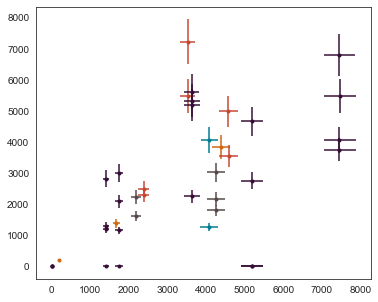

In [152]:
# customParity = plt.scatter(satelliteResults['Estimate (kgh) mean'], satelliteResults['Estimate (KGH) num'], s=10, c='b', marker=satelliteResults['Team'], label='first')

# https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
# Blue, orange, brown, red, purple
colorsIter = itertools.cycle(colors)
# shapes = itertools.cycle(['o', 'x', 's', '+', 'd'])
for satellite in satelliteNames:
    selectedData = satelliteResults.loc[(satelliteResults['Satellite'] == satellite)]
    slctMeteredErrorbars = selectedData[['Estimate (kgh) P2_5', 'Estimate (kgh) P97_5']].sub(selectedData['Estimate (kgh) mean'], axis='index')
    slctMeteredErrorbarsFlat = np.concatenate(np.array(slctMeteredErrorbars)).reshape(len(slctMeteredErrorbars), 2).transpose()
    # selectedErrors = satelliteResults.loc[(satelliteResults['Satellite'] == satellite)]
    slctColor = next(colorsIter)
    # plt.errorbar(selectedData['Estimate (kgh) mean'],
    #             selectedData['Estimate (KGH) num'], xerr=slctMeteredErrorbarsFlat, yerr=selectedData['Estimate (KGH) num']*0.1, fmt='.', color=slctColor)
    plt.errorbar(selectedData['Estimate (kgh) mean'], selectedData['Estimate (KGH) num'],
                 xerr=np.array([np.abs(selectedData['Estimate (kgh) P2_5'] -
                                       selectedData['Estimate (kgh) mean']),
                                np.abs(selectedData['Estimate (kgh) P97_5'] -
                                       selectedData['Estimate (kgh) mean'])]),
                 yerr=selectedData['Estimate (KGH) num']*0.1, fmt='.', color=slctColor)
plt.show()

In [150]:
np.array([np.abs(selectedData['Estimate (kgh) P2_5'] - selectedData['Estimate (kgh) mean']),
          np.abs(selectedData['Estimate (kgh) P97_5'] - selectedData['Estimate (kgh) mean'])])
# np.array([selectedData['Estimate (kgh) mean']*0.1, selectedData['Estimate (kgh) mean']*0.5]).shape

/Users/evansherwin/PycharmProjects/SatelliteTesting/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([0     92.5709
22    242.545
27    11.5539
45          0
48    10.4645
dtype: object,
       0     93.8492
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22    247.544
23        NaN
24        NaN
25        NaN
26        NaN
27    11.7778
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45          0
46        NaN
47        NaN
48     10.776
49        NaN
50        NaN
51        NaN
52        NaN
dtype: object], dtype=object)

In [123]:
selectedData = satelliteResults.loc[(satelliteResults['Satellite'] == 'Sentinel-2')]
slctMeteredErrorbars = selectedData[['Estimate (kgh) P2_5', 'Estimate (kgh) P97_5']].sub(selectedData['Estimate (kgh) mean'], axis='index')
np.concatenate(np.array(slctMeteredErrorbars)).reshape(len(slctMeteredErrorbars), 2).transpose()

array([[-239.35755965078897, -242.21056224737185, -236.66715137490155,
        -238.2221153135697, -406.18621480312595, -403.92453859363195,
        -411.09952576535125, -411.4386346053825, -95.4698217140467,
        -97.45229596963804, -95.90069309945761, -94.27695419072938,
        -230.08663390570064, -231.9330209837708, -230.59370471680995,
        -230.18901169080618, -204.3402194559153, -204.22664002392548,
        -202.06150659662353, -201.88645006284742, -284.10520758488747,
        -284.96757923441146, -281.0152342210413, -284.21026238655486,
        0.0, 0.0, 0.0, 0.0, -76.95054343723586, -77.41189673838426,
        -77.00391178647828, -76.8288800868379],
       [246.25489952293537, 247.24442320834987, 247.4199522035251,
        250.6463841676923, 416.0107347806306, 418.6091883795343,
        421.99574502611176, 414.2366564597269, 97.22417197641244,
        99.16780973625009, 97.77296119556013, 97.43978628806917,
        236.7530751630884, 238.77111505392168, 234.757949269351

In [126]:
satelliteResults

,Date,Time (UTC),Satellite-Team,Satellite,Team,Logged SCFH,Logged KGH,Logged wind speed,Meter,Pipe diameter,...,Notes,Estimate (KGH) num,Error num,Estimate in situ wind (KGH) num,Error in situ wind num,SatelliteNum,teamNum,Estimate (kgh) mean,Estimate (kgh) P2_5,Estimate (kgh) P97_5
0,21/10/16,17:26:00,GHGSAT,GHGSat C2,GHGSat,91337,1673.248327,5.23,2018,4-inch,...,NaN,1382.000000,-17.406163,1534.000000,-8.322036,1,1,1678.41,1586.91,1771.18
1,21/10/16,18:35:00,PRISMA - Guanter,PRISMA,UP Valencia,129895,2379.611673,7.37,2018,8-inch,...,Luis confirms positive plume detection (email ...,2494.000000,4.807017,3777.903361,58.761339,2,2,2387.82,2249.99,2522.85
2,21/10/16,18:35:00,PRISMA - Kayrros,PRISMA,Kayrros,129895,2379.611673,7.37,2018,8-inch,...,NaN,2297.000000,-3.471645,3379.000000,41.997959,2,3,2386.31,2248.35,2523.84
3,21/10/17,18:22:00,Sentinel - Kayrros,Sentinel-2,Kayrros,237967,4359.436861,1.34,2018,8-inch,...,Kayrros told us overpass was 18:22. Actual tim...,NaN,NaN,NaN,NaN,3,3,4374.89,4135.54,4621.15
4,21/10/17,18:22:00,Sentinel - SRON,Sentinel-2,SRON,237967,4359.436861,1.34,2018,8-inch,...,SRON reported no plume,NaN,NaN,NaN,NaN,3,4,4374.09,4131.88,4621.33
5,21/10/17,18:22:00,Sentinel - Guanter,Sentinel-2,UP Valencia,237967,4359.436861,1.34,2018,8-inch,...,NaN,NaN,NaN,NaN,NaN,3,2,4375.41,4138.74,4622.83
6,21/10/17,18:22:00,Sentinel - Varon,Sentinel-2,Varon,237967,4359.000000,1.34,2018,8-inch,...,NaN,NaN,NaN,NaN,NaN,3,5,4372.91,4134.69,4623.56
7,21/10/19,18:25:00,Sentinel - Kayrros,Sentinel-2,Kayrros,405455,7427.733562,NaN,2018,8-inch,...,Kayrros reports plume detection (email 11.1),6790.000000,-8.585843,6098.000000,-17.902279,3,3,7455.27,7049.09,7871.28
8,21/10/19,18:25:00,Sentinel - Guanter,Sentinel-2,UP Valencia,405455,7427.733562,NaN,2018,8-inch,...,NaN,5468.000000,-26.384005,7233.867333,-2.610032,3,2,7454.38,7050.46,7872.99
9,21/10/19,18:25:00,Sentinel - SRON,Sentinel-2,SRON,405455,7427.733562,NaN,2018,8-inch,...,NaN,3760.000000,-49.378906,NaN,NaN,3,4,7456.2,7045.1,7878.19


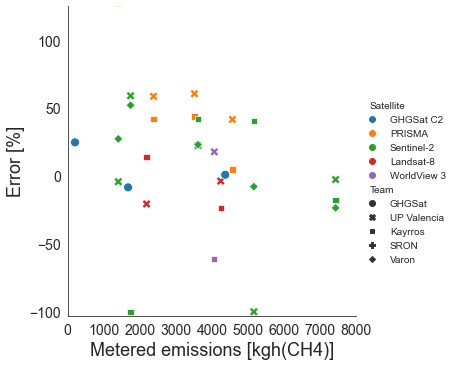

In [17]:
# Percent change
# pctScatterPlot = sns.relplot(data=satelliteResults, x='Logged KGH', y='Error num', style='Team', hue='Satellite', s=80, palette='tab10', kind='scatter') #, legend=False)
# In situ wind
pctScatterPlot = sns.relplot(data=satelliteResults, x='Logged KGH', y='Error in situ wind num', style='Team', hue='Satellite', s=80, palette='tab10', kind='scatter') #, legend=False)
# sns.move_legend(mainScatterPlot, 'upper left', bbox_to_anchor=(0.8, 0.99))
sns.set_style("white")
plt.xlim(0,8000)
plt.ylim(-103,125)
mainScatterPlot._legend.set_title("Satellite")
# mainScatterPlot._legend.draw_frame(True)
mainScatterPlot._legend.set_frame_on(True)
plt.xlabel('Metered emissions [kgh(CH4)]', fontsize=18)
plt.ylabel('Error [%]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (6,5)
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax.get_xaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))# sns.set_style('darkgrid', {'legend.frameon':True})
plt.savefig('Satellite parity error in situ wind 20220228.pdf', format='pdf')
# plt.savefig('Satellite parity error 20220228.pdf', format='pdf')
# plt.show()

In [5]:
# Fraction detected
totalPointsByTeamSat = satelliteResults.loc[satelliteResults['Estimate (KGH)'] != 'Excise'].groupby('Satellite-Team').size()
detectionAccuracy = pd.DataFrame(totalPointsByTeamSat, columns=['Total'])
detectionAccuracy['True positive'] = satelliteResults.loc[(satelliteResults['Estimate (KGH) num'] > 0) & (satelliteResults['Logged KGH'] > 0)].groupby('Satellite-Team').size()
detectionAccuracy['False negative'] = satelliteResults.loc[(satelliteResults['Estimate (KGH) num'] == 0) & (satelliteResults['Logged KGH'] > 0)].groupby('Satellite-Team').size()
detectionAccuracy['True negative'] = satelliteResults.loc[(satelliteResults['Estimate (KGH) num'] == 0) & (satelliteResults['Logged KGH'] == 0)].groupby('Satellite-Team').size()
detectionAccuracy['False positive'] = satelliteResults.loc[(satelliteResults['Estimate (KGH) num'] > 0) & (satelliteResults['Logged KGH'] == 0)].groupby('Satellite-Team').size()
detectionAccuracy['Failed retrieval'] = satelliteResults.loc[satelliteResults['Estimate (KGH)'] == 'FR'].groupby('Satellite-Team').size()
detectionAccuracy['No measurement'] = satelliteResults.loc[satelliteResults['Estimate (KGH)'] == 'No measurement'].groupby('Satellite-Team').size()
detectionAccuracy.head()

,Total,True positive,False negative,True negative,False positive,Failed retrieval,No measurement
Satellite-Team,,,,,,,
GHGSAT,5,3,NaN,NaN,NaN,NaN,2.0
Landsat - Guanter,2,2,NaN,NaN,NaN,NaN,NaN
Landsat - Kayrros,2,2,NaN,NaN,NaN,NaN,NaN
Landsat - SRON,2,1,NaN,NaN,NaN,1.0,NaN
PRISMA - Guanter,4,3,NaN,NaN,NaN,NaN,1.0


In [6]:
detectionFraction = 100*pd.DataFrame(detectionAccuracy.drop(columns='Total').div(detectionAccuracy['Total'], axis='rows'))
detectionFraction[np.isnan(detectionFraction)] = 0
detectionFraction

,True positive,False negative,True negative,False positive,Failed retrieval,No measurement
Satellite-Team,,,,,,
GHGSAT,60.000000,0.000000,0.000000,0.0,0.000000,40.0
Landsat - Guanter,100.000000,0.000000,0.000000,0.0,0.000000,0.0
Landsat - Kayrros,100.000000,0.000000,0.000000,0.0,0.000000,0.0
Landsat - SRON,50.000000,0.000000,0.000000,0.0,50.000000,0.0
PRISMA - Guanter,75.000000,0.000000,0.000000,0.0,0.000000,25.0
PRISMA - Kayrros,75.000000,0.000000,0.000000,0.0,0.000000,25.0
Sentinel - Guanter,57.142857,14.285714,14.285714,0.0,14.285714,0.0
Sentinel - Kayrros,57.142857,14.285714,14.285714,0.0,14.285714,0.0
Sentinel - SRON,42.857143,28.571429,0.000000,0.0,28.571429,0.0


['TruePositives',
 'TrueNegatives',
 'FalseNegatives',
 'FalsePositives',
 'FailedRetrieval',
 'NoMeasurement']

/Users/evansherwin/PycharmProjects/SatelliteTesting/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


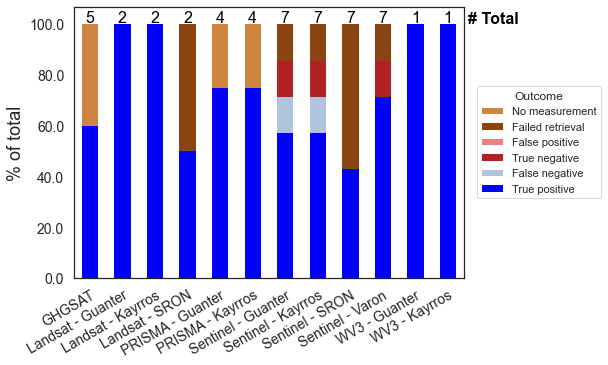

In [213]:
detectFracPlot = detectionFraction.plot(kind='bar', stacked=True, color=['blue', 'lightsteelblue', 'firebrick', 'lightcoral', 'saddlebrown', 'peru']) #, height=6) #, aspect=1.5)
for jj in np.arange(0, detectionAccuracy.iloc[:,0].size):
    detectFracPlot.text(jj-0.14, 100.6, detectionAccuracy.iloc[jj,0], fontsize=16, color='black', rotation='horizontal') # kgh
detectFracPlot.text(jj+0.6, 100.4, '# Total', fontsize=16, weight='bold', color='black', rotation='horizontal') # kgh
handles, labels = detectFracPlot.get_legend_handles_labels()
# detectFracPlot.add_legend(label_order = sorted(detectFracPlot._legend_data.keys(), key = int))
plt.legend(reversed(handles), reversed(labels), title='Outcome', bbox_to_anchor=(1.35, 0.5), loc='center right', borderaxespad=0)#, title_fontsize= 'large')
plt.ylim(0,107)
detectFracPlot.set(xlabel=None, ylabel='% of total')
plt.rcParams["axes.labelsize"] = 20
detectFracPlot.set_xticklabels(detectFracPlot.get_xticklabels(), fontsize=14, rotation=30, horizontalalignment='right', rotation_mode='anchor')
detectFracPlot.set_yticklabels(detectFracPlot.get_yticks(), size = 14)
plt.ylabel('% of total', size=18)
plt.setp(detectFracPlot.patches, linewidth=0)

# # Define some hatches
# hatches = ['', '', '\\', '\\', '', '', '']
#
# # Loop over the bars
# for i,thisbar in enumerate(detectFracPlot.patches):
#     # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i])

# plt.tick_params(axis='both', which='major', labelsize=14)
# detectFracPlot.set_ylabel('Fraction of total', fontsize=18)
# plt.rcParams["figure.figsize"] = (6,5)
# plt.figure(figsize=(6,5))
sns.set(rc={"figure.figsize":(7, 5)})
sns.set_style("white")
# plt.savefig('Detections 20220215.pdf', format='pdf', bbox_inches="tight")
plt.show()

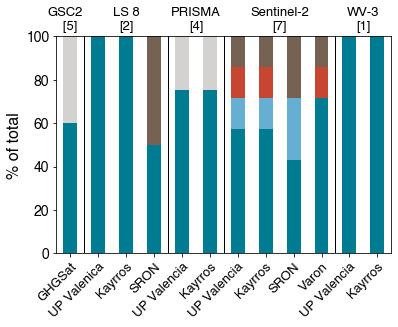

In [12]:
# Matplotlib version of detection plot
# Colors: https://identity.stanford.edu/design-elements/color/accent-colors/
# ['#007C92', '#67AFD2', '#C74632', '#F4795B', '#766253', '#D4D1D1']

fig, ax = plt.subplots()
#plt.font_manager._rebuild()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Helvetica'})
# rc('font',**{'family':'serif','serif':['Helvetica']})
bar1 = ax.bar(detectionFraction.index, detectionFraction['True positive'], width=0.5, ec='None', color='#007C92')
bar2 = ax.bar(detectionFraction.index, detectionFraction['False negative'], bottom=detectionFraction['True positive'], ec='None', width=0.5, color='#67AFD2')
bar3 = ax.bar(detectionFraction.index, detectionFraction['True negative'], bottom=detectionFraction['True positive'] + detectionFraction['False negative'], ec='None', width=0.5, color='#C74632')
bar4 = ax.bar(detectionFraction.index, detectionFraction['False positive'], bottom=detectionFraction['True positive'] + detectionFraction['False negative'] + detectionFraction['True negative'], ec='None', width=0.5, color='#F4795B')
bar5 = ax.bar(detectionFraction.index, detectionFraction['Failed retrieval'], bottom=detectionFraction['True positive'] + detectionFraction['False negative'] + detectionFraction['True negative'] + detectionFraction['False positive'], ec='None', width=0.5, color='#766253')
bar6 = ax.bar(detectionFraction.index, detectionFraction['No measurement'], bottom=detectionFraction['True positive'] + detectionFraction['False negative'] + detectionFraction['True negative'] + detectionFraction['False positive'] + detectionFraction['Failed retrieval'], ec='None', width=0.5, color='#D4D1D1')
# for jj in np.arange(0, detectionAccuracy.iloc[:,0].size):
#     ax.text(jj-0.14, 100.6, detectionAccuracy.iloc[jj,0], fontsize=16, color='black', rotation='horizontal') # kgh
plt.ylabel('% of total', size=16)
# plt.xlabel('Team', size=16)
plt.xticks(np.arange(0, detectionAccuracy.iloc[:,0].size, 1), fontsize=13, rotation=90)
ax.set_xticklabels(['GHGSat', 'UP Valenica', 'Kayrros', 'SRON', 'UP Valencia', 'Kayrros', 'UP Valencia', 'Kayrros', 'SRON', 'Varon', 'UP Valencia', 'Kayrros'], rotation=45, rotation_mode='anchor', ha='right')
plt.text(-0.2, 103, 'GSC2\n   [5]', fontsize=13, color='black', rotation=0, ha='center') # -63
plt.text(2, 103, 'LS 8\n[2]', fontsize=13, color='black', rotation=0, ha='center') # -70
plt.text(4.5, 103, 'PRISMA\n[4]', fontsize=13, color='black', rotation=0, ha='center') # -64
plt.text(7.5, 103, 'Sentinel-2\n[7]', fontsize=13, color='black', rotation=0, ha='center') # -68
plt.text(10.5, 103, 'WV-3\n[1]', fontsize=13, color='black', rotation=0, ha='center') # -55
plt.axvline(0.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(3.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(5.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(9.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.yticks(np.arange(0, 101, 20), fontsize=14)
plt.ylim(0,100) # 107
plt.xlim(-0.5,11.5)
# plt.text(11+0.6, 100.4, '# Total', fontsize=18, color='black', rotation='horizontal') # kgh
# plt.text(-3, -20, 'Team', fontsize=20, color='black', rotation=0) # -55
# ax.legend(labels=detectionFraction.columns) # , handles=[bar1, bar2, bar3, bar4, bar5, bar6]
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
# plt.rcParams['text.usetex'] = True # http://phyletica.org/matplotlib-fonts/
# plt.rcParams['ps.fonttype'] = 42
plt.savefig('Detections 20220322c.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [26]:
# Total estimates reported by all teams
# totalPointsAllTeams = (satelliteResults.loc[satelliteResults['Estimate (KGH)'] != 'Excise'].index).size
detectionAccuracyAllTeams = np.sum(detectionAccuracy)
detectionAccuracyAllTeams, detectionAccuracyAllTeams/detectionAccuracyAllTeams[0]
# satelliteResults.loc[satelliteResults['Estimate (KGH)'] != 'Excise'].size()

(Total               49.0
 True positive       32.0
 False negative       2.0
 True negative        3.0
 False positive       0.0
 Failed retrieval     8.0
 No measurement       4.0
 dtype: float64,
 Total               1.000000
 True positive       0.653061
 False negative      0.040816
 True negative       0.061224
 False positive      0.000000
 Failed retrieval    0.163265
 No measurement      0.081633
 dtype: float64)

In [34]:
# Error statistics
satelliteResults.loc[satelliteResults['Error num'] > -100, 'Error num'].describe()
detectedResults = satelliteResults.loc[satelliteResults['Error num'] > -100, 'Error num'].size
detectedResultsUnder50 = (abs(satelliteResults.loc[satelliteResults['Error num'] > -100, 'Error num']) < 50).sum()
detectedResultsUnder50, detectedResults, detectedResultsUnder50/detectedResults

(26, 32, 0.8125)

In [105]:
# Global Methane Pledge
ngProduction = pd.read_excel('/Users/evansherwin/PycharmProjects/SatelliteTesting/Data/EIA gas by country-02-22-2022_09-05-13.xls', sheet_name="EIA gas by country-02-22-2022_0", skiprows=1)
GMPCountries = pd.read_excel('/Users/evansherwin/PycharmProjects/SatelliteTesting/Data/GMP countries 20220222.xls', sheet_name="Sheet1")
ngProduction['Country'] = ngProduction['Unnamed: 1'].str.strip()
# ngProduction
# GMPCountries
# ngProduction['Country'].values.tolist()
# ngProduction['Country'].isin(GMPCountries).describe()
GMPCountriesProd = ngProduction.loc[ngProduction['Country'].isin(GMPCountries.iloc[:,0]), ['Country', 2019]]
GMPCountriesProdTot = GMPCountriesProd[2019].sum()
WorldProd = ngProduction.loc[ngProduction['Country']=='World', 2019]
GMPCountriesProdFrac = GMPCountriesProdTot/WorldProd
GMPCountriesProdTot, GMPCountriesProdFrac

(70775.037626469,
 1    0.496253
 Name: 2019, dtype: object)

In [109]:
GMPCountriesProd[GMPCountriesProd['Country']=='Gambia, The'],GMPCountriesProd.index.size



(        Country 2019
 78  Gambia, The    0,
 104)